In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouseDF =pd.read_csv(mouse_drug_data_to_load)
clinicalDF = pd.read_csv(clinical_trial_data_to_load)

totalDF = pd.merge(clinicalDF, mouseDF, on='Mouse ID', how='outer')
totalDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [105]:
# group by drug and timepoint

drug_timeGroup = totalDF.groupby(['Drug', 'Timepoint'])
drug_timeDF = pd.DataFrame(drug_timeGroup['Tumor Volume (mm3)'].mean())
drug_timeDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [106]:
# Standard Error of Tumor Volume
tumor_vol_STDERR = drug_timeGroup['Tumor Volume (mm3)'].sem()
tumor_vol_STDERR_DF = pd.DataFrame(tumor_vol_STDERR)
tumor_vol_STDERR_DF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [118]:
# Data  Munging
drug_time_reformmatedDF = drug_timeDF.unstack('Drug')
drug_time_reformmatedDF = drug_time_reformmatedDF['Tumor Volume (mm3)']
drug_time_reformmatedDF
drug_time_STDERR_reformmatedDF = tumor_vol_STDERR_DF.unstack('Drug')
drug_time_STDERR_reformmatedDF = drug_time_STDERR_reformmatedDF['Tumor Volume (mm3)']
drug_time_reformmatedDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [119]:
# Similarly formatted table with std err to easily pull a series for each drug
drug_time_STDERR_reformmatedDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


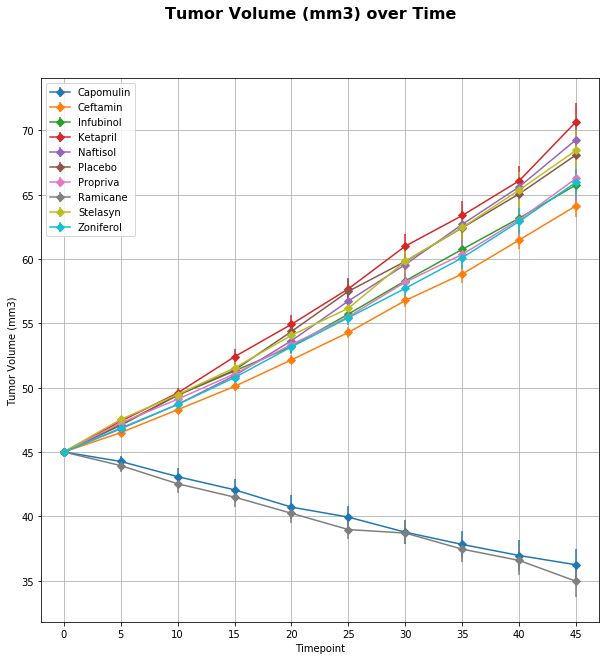

In [156]:
# Tumor Volume over Time with Errorbars
x_axis = drug_time_reformmatedDF.index
fig, ax1 = plt.subplots()
fig.suptitle("Tumor Volume (mm3) over Time", fontsize=16, fontweight="bold")
fig.set_figwidth(10)
fig.set_figheight(10)

for x in handles:
    ax1.errorbar(x_axis, drug_time_reformmatedDF[x], yerr=drug_time_STDERR_reformmatedDF[x], marker='D')

handles = drug_time_STDERR_reformmatedDF.columns
ax1.set_xlim(-2, 47)
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.legend(handles, loc=2)
ax1.set_xticks(np.arange(0,50,5))



plt.savefig('Tumor Volume (mm3) over time.png')
ax1.grid()
plt.show()